Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


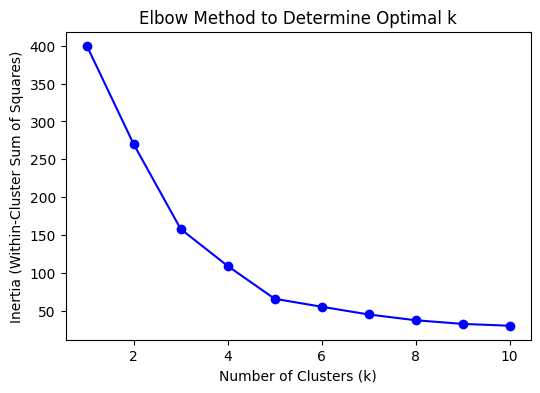

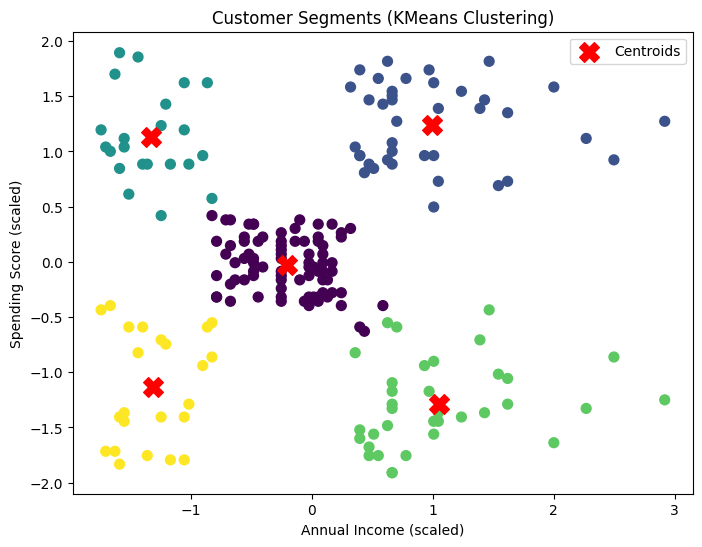

Cluster distribution:
Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [1]:
# --- Step 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Step 2: Load Dataset ---
df = pd.read_csv("/content/Mall_Customers.csv")
print("Dataset Preview:")
print(df.head())

# --- Step 3: Select Features (Annual Income & Spending Score) ---
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# --- Step 4: Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 5: Elbow Method to Find Optimal k ---
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# --- Step 6: Apply KMeans with Optimal k (let's assume 5 from elbow method) ---
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- Step 7: Visualize Clusters ---
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments (KMeans Clustering)')
plt.legend()
plt.show()

# --- Step 8: Show Cluster Counts ---
print("Cluster distribution:")
print(df['Cluster'].value_counts())


Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


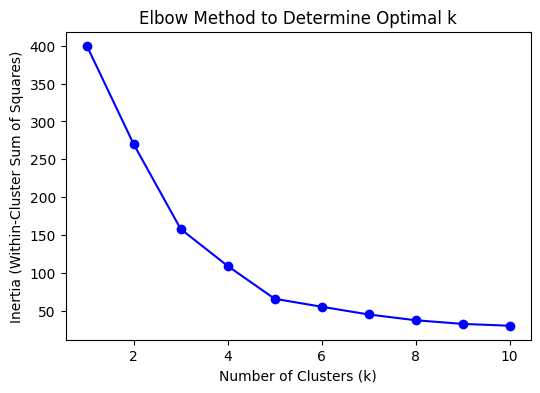

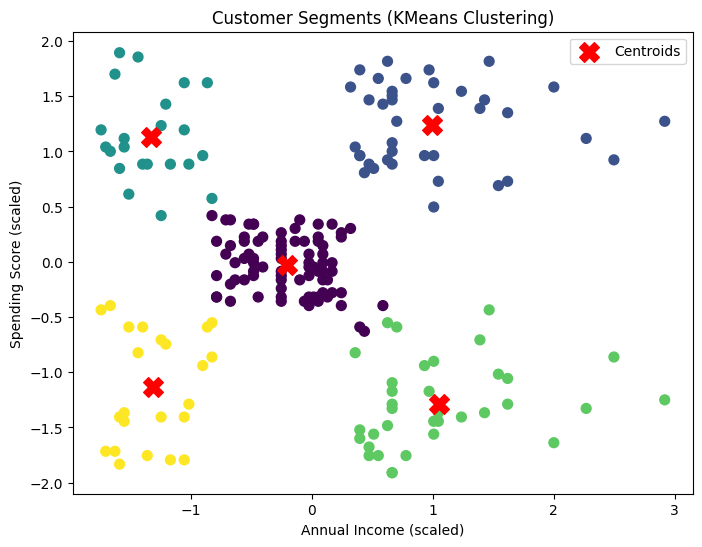


Average Spending Score per KMeans Cluster:
KMeans_Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


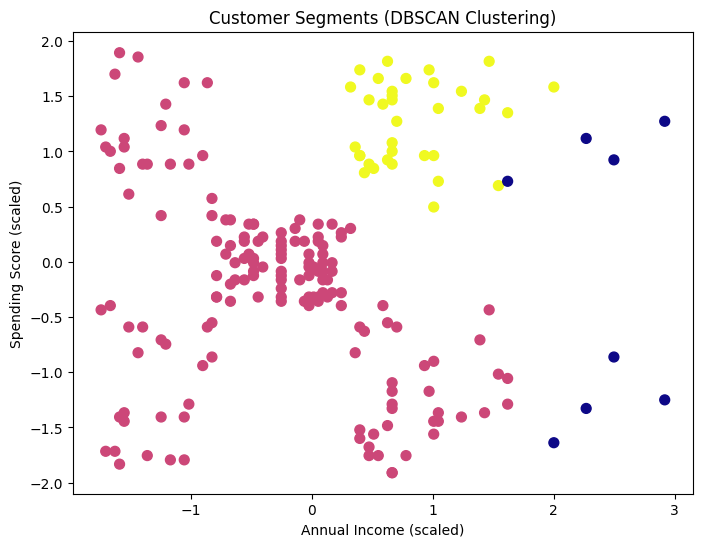


Average Spending Score per DBSCAN Cluster:
DBSCAN_Cluster
-1    46.875000
 0    43.101911
 1    82.800000
Name: Spending Score (1-100), dtype: float64

Cluster distribution (KMeans):
KMeans_Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

Cluster distribution (DBSCAN):
DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


In [2]:
# --- Step 1: Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

# --- Step 2: Load Dataset ---
df = pd.read_csv("/content/Mall_Customers.csv")
print("Dataset Preview:")
print(df.head())

# --- Step 3: Select Features (Annual Income & Spending Score) ---
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# --- Step 4: Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 5: Elbow Method for KMeans ---
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# --- Step 6: Apply KMeans with optimal k (assume 5) ---
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# --- Step 7: Visualize KMeans Clusters ---
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments (KMeans Clustering)')
plt.legend()
plt.show()

# --- Step 8: Analyze Average Spending per KMeans Cluster ---
print("\nAverage Spending Score per KMeans Cluster:")
print(df.groupby('KMeans_Cluster')['Spending Score (1-100)'].mean())

# --- Step 9: Apply DBSCAN ---
dbscan = DBSCAN(eps=0.5, min_samples=5)  # you may tune eps & min_samples
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# --- Step 10: Visualize DBSCAN Clusters ---
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments (DBSCAN Clustering)')
plt.show()

# --- Step 11: Analyze Average Spending per DBSCAN Cluster ---
print("\nAverage Spending Score per DBSCAN Cluster:")
print(df.groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean())

# --- Step 12: Show Cluster Counts for Both ---
print("\nCluster distribution (KMeans):")
print(df['KMeans_Cluster'].value_counts())

print("\nCluster distribution (DBSCAN):")
print(df['DBSCAN_Cluster'].value_counts())


In [ ]:
from google.colab import drive
drive.mount('/content/drive')